In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility.analysis_parameters import COLORS
from scipy.stats import linregress

In [2]:
def abline(slope, intercept, xlim):
    """Plot a line from slope and intercept"""
    x_vals = np.array(xlim)
    y_vals = intercept + slope * x_vals
    return x_vals, y_vals

In [26]:
models = ["OBS", "ARP", "GEOS", "ICON", "IFS", "MPAS", "SAM", "SCREAM", "SHiELD", "UM"]
markers=['o','D','v','^','s','<','>','.','*','p','P']

In [27]:
olr_vals = [258,253,269,266,269,250,272,268,262,264]
pr_vals = [99,107,112,115,117,82,127,125,112,124]

In [28]:
# Fit a linear regression model using linregress
slope, intercept, r_value, p_value, std_err = linregress(olr_vals, pr_vals)
r_squared = r_value**2
print(f'R-squared: {r_squared:.4f}')

R-squared: 0.7104


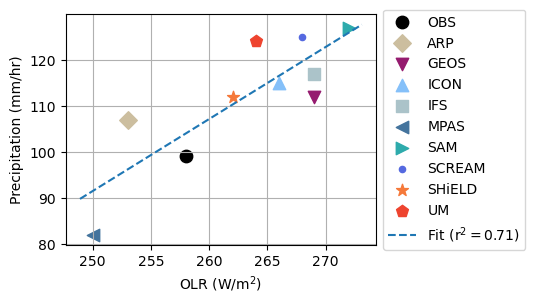

In [34]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
for i,m in enumerate(models):
    ax.scatter(olr_vals[i], pr_vals[i], c=COLORS[m], s=80, marker=markers[i], label=m)
xlim=ax.get_xlim()
x,y = abline(slope, intercept, xlim)
ax.plot(x,y,'--', label="Fit (r$^2=0.71$)")
ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
ax.set(ylabel="Precipitation (mm/hr)", xlabel="OLR (W/m$^2$)")
ax.grid()
plt.savefig("../plots/GT/OLRvsPRmean.png", dpi=200, bbox_inches="tight", pad_inches=0.6)
plt.show()